In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [119]:
data = pd.read_csv('titanic.csv')
data = data[['Age','Fare','Survived']]

data

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
886,27.0,13.0000,0
887,19.0,30.0000,1
888,NaN,23.4500,0
889,26.0,30.0000,1


Mean

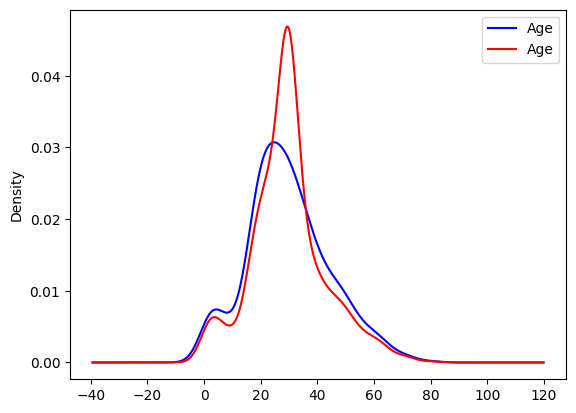

In [120]:
data_mean = data.copy() 
value_mean = data_mean['Age'].dropna().mean()  
data_mean['Age'].fillna(value_mean, inplace=True)
fig = plt.figure()
ax = fig.add_subplot(111)
data['Age'].plot(kind='kde', color='blue')
data_mean['Age'].plot(kind='kde', color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


Median

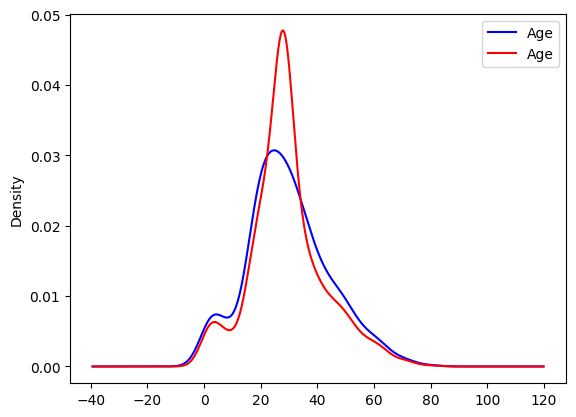

In [121]:
data_median = data.copy() 
value_median = data_median['Age'].dropna().median()  
data_median['Age'].fillna(value_median, inplace=True)
fig = plt.figure()
ax = fig.add_subplot(111)
data['Age'].plot(kind='kde', color='blue')
data_median['Age'].plot(kind='kde', color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Mode

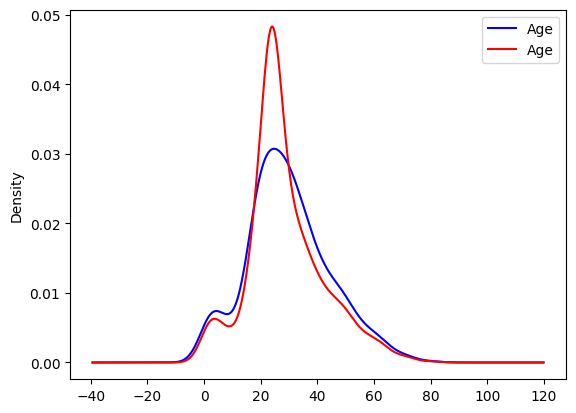

In [122]:
data_mode = data.copy() 
value_mode = data_mode['Age'].dropna().mode()[0]  
data_mode['Age'].fillna(value_mode, inplace=True)
fig = plt.figure()
ax = fig.add_subplot(111)
data['Age'].plot(kind='kde', color='blue')
data_mode['Age'].plot(kind='kde', color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

giá trị ngẫu nhiên

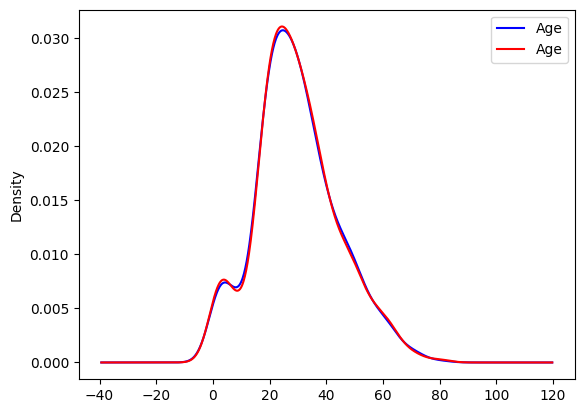

In [123]:
data_random = data.copy()
value_random = data_random['Age'].dropna().sample(n=data['Age'].isnull().sum(), random_state=0)
value_random.index = data_random[data_random['Age'].isnull()].index
data_random['Age'].update(value_random)
fig = plt.figure()
ax = fig.add_subplot(111)
data['Age'].plot(kind='kde', color='blue')
data_random['Age'].plot(kind='kde', color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

 giá trị đuôi của phân bố

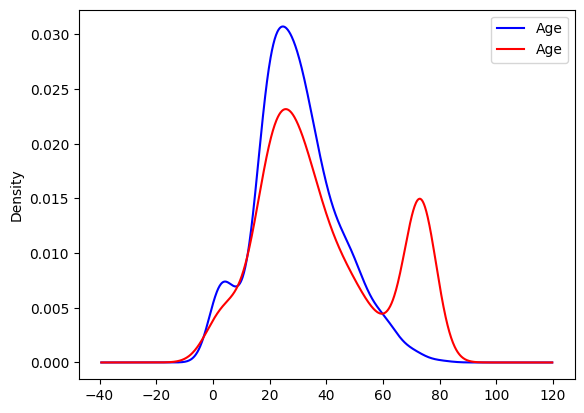

In [124]:
data_extreme = data.copy()
value_extreme = data_extreme['Age'].mean() + 3*data_extreme['Age'].std()
data_extreme['Age'].fillna(value_extreme, inplace=True)
fig = plt.figure()
ax = fig.add_subplot(111)
data['Age'].plot(kind='kde', color='blue')
data_extreme['Age'].plot(kind='kde', color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

giá trị bất kỳ

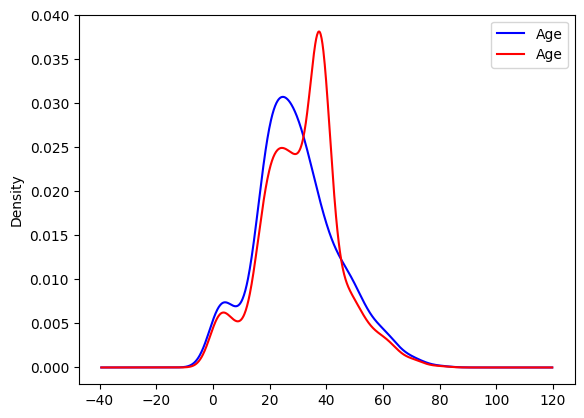

In [125]:
data_arbitrary = data.copy()
data_arbitrary['Age'].fillna(38, inplace=True)
fig = plt.figure()
ax = fig.add_subplot(111)
data['Age'].plot(kind='kde', color='blue')
data_arbitrary['Age'].plot(kind='kde', color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Tạo đặc trưng mới

In [126]:
def add_age_nan(data):
  data['Age_nan'] = np.where(data['Age'].isnull(), 1, 0)
  return data
data_add_new_feature = data.copy()
data_add_new_feature = add_age_nan(data_add_new_feature)
data_add_new_feature['Age'].fillna(38, inplace=True)

Xử lí ngoại lệ

<Axes: >

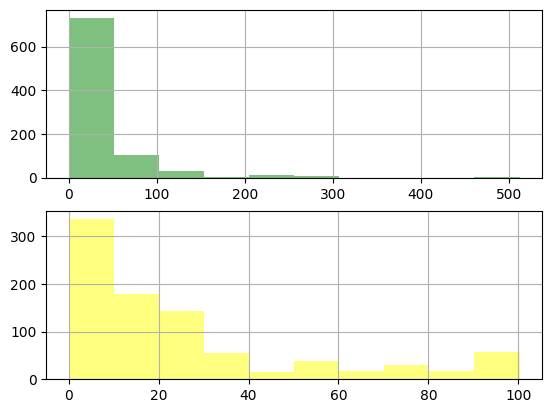

In [127]:

def outlier_process(data):
  dttemp = data.copy()

  Bienduoi1 = dttemp['Age'].mean() - 3*dttemp['Age'].std()
  Bientren1 = dttemp['Age'].mean() + 3*dttemp['Age'].std()

  dttemp.loc[dttemp['Age'] < Bienduoi1, 'Age'] = Bienduoi1
  dttemp.loc[dttemp['Age'] > Bientren1, 'Age'] = Bientren1

  iqr = dttemp['Fare'].quantile(0.75) - dttemp['Fare'].quantile(0.25)
  Bientren1 = dttemp['Fare'].quantile(0.75) + 3*iqr
  Bienduoi1= dttemp['Fare'].quantile(0.25) - 3*iqr

  dttemp.loc[dttemp['Fare'] < Bienduoi1, 'Fare'] = Bienduoi1
  dttemp.loc[dttemp['Fare'] > Bientren1, 'Fare'] = Bientren1

  return dttemp


data_outlier = outlier_process(data)
# histogram
plt.subplot(2,1,1)
data['Fare'].hist(color='green', alpha=0.5)
plt.subplot(2,1,2)
data_outlier['Fare'].hist(color='yellow', alpha=0.5)




## BÀi 2

Các kĩ thuật chuẩn hóa, lần lượt là z-Score, Min-max, Robust

In [128]:
from sklearn.preprocessing import StandardScaler
def z_Score(data, isAge_nan =False):
  if isAge_nan:
    data_temp = pd.DataFrame(StandardScaler().fit_transform(data[['Age', 'Fare', 'Age_nan']]), columns=['Age', 'Fare','Age_nan'])
  else:
    data_temp = pd.DataFrame(StandardScaler().fit_transform(data[['Age', 'Fare']]), columns=['Age', 'Fare'])
     
  data_temp['Survived'] = data['Survived']

  return data_temp

from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
def min_Max(data):
    newdata = pd.DataFrame(min_max.fit_transform(data),columns=data.columns)
    return newdata


from sklearn.preprocessing import RobustScaler
robust_caler=RobustScaler()
def Robust(data):
    return pd.DataFrame(robust_caler.fit_transform(data),columns=data.columns)


from sklearn.preprocessing import MaxAbsScaler
max_abs=MaxAbsScaler()
def max_Abs(data):
    newdata = pd.DataFrame(max_abs.fit_transform(data),columns=data.columns)
    return newdata

from sklearn.preprocessing import MaxAbsScaler
max_abs=MaxAbsScaler()
def max_Abs(data):
    newdata = pd.DataFrame(max_abs.fit_transform(data),columns=data.columns)
    return newdata



In [129]:


def mean_accuracy(data, is_data_add_new_feature):
  accuracies = []

  for i in range(10):
    predictors = data[['Age', 'Fare']]
    if is_data_add_new_feature==True:
      predictors = data[['Age', 'Fare','Age_nan']]
      
    target = data['Survived']
    x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=i)
    classifier = LogisticRegression()
    classifier.fit(x_train, y_train)
    classifier.predict(x_test)
    accuracy = classifier.score(x_test, y_test)
    accuracies.append(accuracy)

  return np.mean(accuracies)

In [130]:


accuracy_normal = {
  'mean': mean_accuracy(data_mean,False),
  'median': mean_accuracy(data_median,False),
  'mode': mean_accuracy(data_mode,False),
  'random': mean_accuracy(data_random,False),
  'extreme': mean_accuracy(data_extreme,False),
  'arbitrary': mean_accuracy(data_arbitrary,False),
  'addnewfeature': mean_accuracy(data_add_new_feature, True)
}
accuracy_normal_min_max = {
  'mean': mean_accuracy(min_Max(data_mean),False),
  'median': mean_accuracy(min_Max(data_median),False),
  'mode': mean_accuracy(min_Max(data_mode),False),
  'random': mean_accuracy(min_Max(data_random),False),
  'extreme': mean_accuracy(min_Max(data_extreme),False),
  'arbitrary': mean_accuracy(min_Max(data_arbitrary),False),
  'addnewfeature': mean_accuracy(min_Max(data_add_new_feature), True)
}


accuracy_normal_robust = {
  'mean': mean_accuracy(Robust(data_mean),False),
  'median': mean_accuracy(Robust(data_median),False),
  'mode': mean_accuracy(Robust(data_mode),False),
  'random': mean_accuracy(Robust(data_random),False),
  'extreme': mean_accuracy(Robust(data_extreme),False),
  'arbitrary': mean_accuracy(Robust(data_arbitrary),False),
  'addnewfeature': mean_accuracy(Robust(data_add_new_feature), True)
}
accuracy_outlier_process_robust = {
  'mean': mean_accuracy(Robust(outlier_process(data_mean)),False),
  'median': mean_accuracy(Robust(outlier_process(data_median)),False),
  'mode': mean_accuracy(Robust(outlier_process(data_mode)),False),
  'random': mean_accuracy(Robust(outlier_process(data_random)),False),
  'extreme': mean_accuracy(Robust(outlier_process(data_extreme)),False),
  'arbitrary': mean_accuracy(Robust(outlier_process(data_arbitrary)),False),
  'addnewfeature': mean_accuracy(Robust(outlier_process(data_add_new_feature)),True)

}

accuracy_outlier_process = {
  'mean': mean_accuracy(outlier_process(data_mean),False),
  'median': mean_accuracy(outlier_process(data_median),False),
  'mode': mean_accuracy(outlier_process(data_mode),False),
  'random': mean_accuracy(outlier_process(data_random),False),
  'extreme': mean_accuracy(outlier_process(data_extreme),False),
  'arbitrary': mean_accuracy(outlier_process(data_arbitrary),False),
  'addnewfeature': mean_accuracy(outlier_process(data_add_new_feature),True)

}

accuracy_outlier_process_min_max = {
  'mean': mean_accuracy(min_Max(outlier_process(data_mean)),False),
  'median': mean_accuracy(min_Max(outlier_process(data_median)),False),
  'mode': mean_accuracy(min_Max(outlier_process(data_mode)),False),
  'random': mean_accuracy(min_Max(outlier_process(data_random)),False),
  'extreme': mean_accuracy(min_Max(outlier_process(data_extreme)),False),
  'arbitrary': mean_accuracy(min_Max(outlier_process(data_arbitrary)),False),
  'addnewfeature': mean_accuracy(min_Max(outlier_process(data_add_new_feature)),True)

}

accuracy_normal_z_Score = {
  'mean': mean_accuracy(z_Score(data_mean),False),
  'median': mean_accuracy(z_Score(data_median),False),
  'mode': mean_accuracy(z_Score(data_mode),False),
  'random': mean_accuracy(z_Score(data_random),False),
  'extreme': mean_accuracy(z_Score(data_extreme),False),
  'arbitrary': mean_accuracy(z_Score(data_arbitrary),False),
  'addnewfeature': mean_accuracy(z_Score(data_add_new_feature, True), True)
}
accuracy_outlier_process_z_Score = {
  'mean': mean_accuracy(z_Score(outlier_process(data_mean)),False),
  'median': mean_accuracy(z_Score(outlier_process(data_median)),False),
  'mode': mean_accuracy(z_Score(outlier_process(data_mode)),False),
  'random': mean_accuracy(z_Score(outlier_process(data_random)),False),
  'extreme': mean_accuracy(z_Score(outlier_process(data_extreme)),False),
  'arbitrary': mean_accuracy(z_Score(outlier_process(data_arbitrary)),False),
  'addnewfeature': mean_accuracy(z_Score(outlier_process(data_add_new_feature), True),True)

}

accuracy_normal_max_Abs = {
  'mean': mean_accuracy(max_Abs(data_mean),False),
  'median': mean_accuracy(max_Abs(data_median),False),
  'mode': mean_accuracy(max_Abs(data_mode),False),
  'random': mean_accuracy(max_Abs(data_random),False),
  'extreme': mean_accuracy(max_Abs(data_extreme),False),
  'arbitrary': mean_accuracy(max_Abs(data_arbitrary),False),
  'addnewfeature': mean_accuracy(max_Abs(data_add_new_feature), True)
}
accuracy_outlier_process_max_Abs = {
  'mean': mean_accuracy(max_Abs(outlier_process(data_mean)),False),
  'median': mean_accuracy(max_Abs(outlier_process(data_median)),False),
  'mode': mean_accuracy(max_Abs(outlier_process(data_mode)),False),
  'random': mean_accuracy(max_Abs(outlier_process(data_random)),False),
  'extreme': mean_accuracy(max_Abs(outlier_process(data_extreme)),False),
  'arbitrary': mean_accuracy(max_Abs(outlier_process(data_arbitrary)),False),
  'addnewfeature': mean_accuracy(max_Abs(outlier_process(data_add_new_feature)),True)

}




df = pd.DataFrame({'Normal': accuracy_normal,
                  'Normal_z_Score':accuracy_normal_z_Score,
                  'Normal_min_max':accuracy_normal_min_max,
                  'Normal_robust':accuracy_normal_robust,
                  'Normal_max_abs':accuracy_normal_max_Abs,
                  'Outlier':accuracy_outlier_process,
                  'Oulier_z_Score':accuracy_outlier_process_z_Score,
                  'Outlier_min_max': accuracy_outlier_process_min_max ,
                  'Outlier_robust': accuracy_outlier_process_robust,
                  'Outlier_max_abs':accuracy_outlier_process_max_Abs,
                  })

styled_df = df.style.highlight_max(color='#1689dd', axis=0)

styled_df

,Normal,Normal_z_Score,Normal_min_max,Normal_robust,Normal_max_abs,Outlier,Oulier_z_Score,Outlier_min_max,Outlier_robust,Outlier_max_abs
mean,0.652985,0.653358,0.646269,0.652985,0.646269,0.667164,0.666791,0.669030,0.666791,0.669030
median,0.653358,0.653358,0.647015,0.653358,0.647015,0.667164,0.666045,0.669403,0.666045,0.669403
mode,0.653358,0.652612,0.645522,0.653358,0.645522,0.665672,0.665672,0.668657,0.665672,0.668657
random,0.654478,0.653731,0.647015,0.655224,0.647015,0.667910,0.668284,0.668657,0.667910,0.668657
extreme,0.663806,0.663433,0.644776,0.663060,0.644776,0.666418,0.666791,0.664925,0.666791,0.664925
arbitrary,0.657463,0.657463,0.644776,0.656343,0.645149,0.666045,0.666418,0.664925,0.665672,0.664925
addnewfeature,0.659328,0.659328,0.643284,0.660075,0.643284,0.662313,0.662687,0.663060,0.662687,0.663060
